[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')
C:\Users\Lenovo T490s\anaconda3\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


ผลตอบแทนเฉลี่ยรายวันของ AAPL: nan%
ส่วนเบี่ยงเบนมาตรฐานของผลตอบแทนรายวัน: nan%
ช่วงความเชื่อมั่น 95% สำหรับผลตอบแทนในวันถัดไป: [nan%, nan%]
ความน่าจะเป็นที่หุ้น AAPL จะเพิ่มขึ้นมากกว่า 2% ในวันถัดไป: nan หรือ nan%


C:\Users\Lenovo T490s\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo T490s\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo T490s\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo T490s\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo T490s\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWar

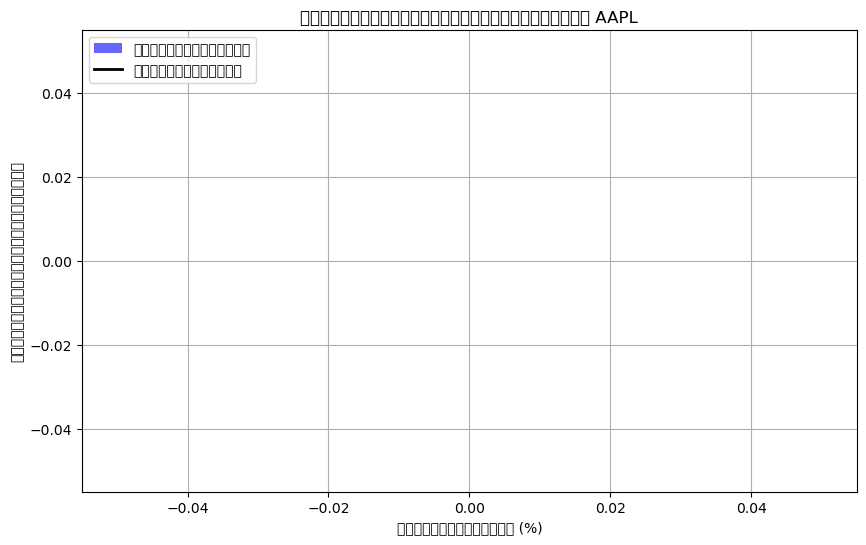

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy import stats

# ดาวน์โหลดข้อมูลหุ้น
ticker = "AAPL"
stock_data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# คำนวณผลตอบแทนรายวัน
stock_data['Daily_Return'] = stock_data['Adj Close'].pct_change() * 100

# ลบค่า NaN
daily_returns = stock_data['Daily_Return'].dropna()

# คำนวณสถิติพื้นฐาน
mean_return = daily_returns.mean()
std_return = daily_returns.std()

print(f"ผลตอบแทนเฉลี่ยรายวันของ {ticker}: {mean_return:.2f}%")
print(f"ส่วนเบี่ยงเบนมาตรฐานของผลตอบแทนรายวัน: {std_return:.2f}%")

# สร้างช่วงความเชื่อมั่น 95% โดยใช้กฎเชิงประจักษ์
lower_bound = mean_return - 2 * std_return
upper_bound = mean_return + 2 * std_return
print(f"ช่วงความเชื่อมั่น 95% สำหรับผลตอบแทนในวันถัดไป: [{lower_bound:.2f}%, {upper_bound:.2f}%]")

# คำนวณความน่าจะเป็นที่หุ้นจะเพิ่มขึ้นมากกว่า 2%
prob_increase_2pct = 1 - stats.norm.cdf(2, mean_return, std_return)
print(f"ความน่าจะเป็นที่หุ้น {ticker} จะเพิ่มขึ้นมากกว่า 2% ในวันถัดไป: {prob_increase_2pct:.2f} หรือ {prob_increase_2pct*100:.2f}%")

# แสดงฮิสโตแกรมของผลตอบแทนรายวันพร้อมเส้นการแจกแจงปกติ
plt.figure(figsize=(10, 6))
plt.hist(daily_returns, bins=30, density=True, alpha=0.6, color='blue', label='ผลตอบแทนรายวัน')

# สร้างเส้นการแจกแจงปกติ
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_return, std_return)
plt.plot(x, p, 'k', linewidth=2, label='การแจกแจงปกติ')

plt.title(f'การแจกแจงของผลตอบแทนรายวันของ {ticker}')
plt.xlabel('ผลตอบแทนรายวัน (%)')
plt.ylabel('ความหนาแน่นความน่าจะเป็น')
plt.legend()
plt.grid(True)
plt.show()